In [44]:
import matplotlib.pyplot as plt
import os,glob,imp,copy
import numpy as np
import seaborn as sns
import pyslha, copy, pickle
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d,griddata
import itertools
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.rm"] = 'serif'
# plt.rcParams["mathtext.it"] = 'serif:italic'
# plt.rcParams["mathtext.bf"] = 'serif:bold'
# plt.rcParams["mathtext.fontset"] = 'custom'
# plt.rcParams['text.usetex'] = True

In [2]:
def getContour(xpts,ypts,zpts,levels,ylog=False,xlog=False):
    """
    Uses pyplot tricontour method to obtain contour
    curves in a 2D plane.

    :return: A dictionary with a list of contours for each level
    """
    
    fig = plt.figure()
    x = copy.deepcopy(xpts)
    y = copy.deepcopy(ypts)
    z = copy.deepcopy(zpts)
    
    #Use log scale:
    if ylog:
        y = np.log10(y)
    if xlog:
        x = np.log10(x)
    
    CS = plt.tricontour(x,y,z,levels=levels)    
    levelPts = {}
    for il,level in enumerate(CS.levels):
        levelPts[level] = []
        c = CS.collections[il]        
        paths = c.get_paths()
        for path in paths:
            levelPts[level].append(path.vertices)
    plt.close(fig)
    
    #scale back:
    if ylog or xlog:
        for key,ptsList in levelPts.items():
            newList = []
            for pts in ptsList:
                xpts = pts[:,0]
                ypts = pts[:,1]
                if xlog:
                    xpts = 10**xpts
                if ylog:
                    ypts = 10**ypts
                newList.append(np.column_stack((xpts,ypts)))
            levelPts[key] = newList
        
    
    return levelPts

In [3]:
exec(open("./T2Disp_2EqMassAx_EqWidthAy_EqMassB0.0.py").read())
data = copy.deepcopy(validationData)

In [35]:
#Get points to compute exclusion curves:
xpts = []
ypts = []
rpts = []
for pt in data:
    if 'error' in pt: continue
    xpts.append(pt['axes']['x'])
    ypts.append(pt['axes']['y'])
    rpts.append(pt['signal']/pt['UL'])
excCurve = getContour(xpts,ypts,rpts,levels=[1.0],ylog=True)

In [36]:
#Official curve
excCMS = np.genfromtxt('CMS-EXO-19-001_Figure_004.csv',delimiter=',',
                       names=True)

In [62]:
#Get more points:
pts = np.column_stack((xpts, np.log10(ypts)))
xnew = np.linspace(min(xpts),max(xpts),250)
ynew = np.linspace(np.log10(min(ypts)),np.log10(max(ypts)),250)
newpts = np.array(list(itertools.product(xnew,ynew)))
znew = griddata(pts,rpts,newpts)

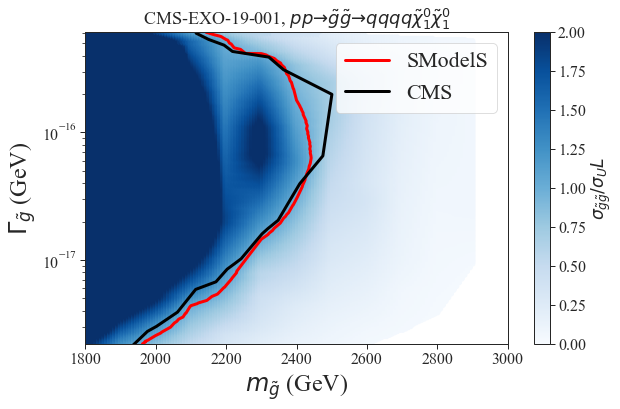

In [63]:
fig = plt.figure(figsize=(9,6))

plt.scatter(newpts[:,0],10**newpts[:,1],c=znew,vmin=0.0,vmax=2.0,cmap=sns.color_palette("Blues", as_cmap=True))

plt.plot(excCurve[1.0][0][:,0],excCurve[1.0][0][:,1],
         label='SModelS',
         linewidth=3,linestyle='-',color='red')

plt.plot(excCMS['mgluino'],excCMS['width'],label='CMS',
         linewidth=3,linestyle='-',color='black')

plt.ylabel(r'$\Gamma_{\tilde g}$ (GeV)',fontsize=24)
plt.xlabel(r'$m_{\tilde g}$ (GeV)',fontsize=24)
plt.title(r'CMS-EXO-19-001, $p p \to \tilde{g} \tilde{g} \to q q  q q \tilde{\chi}_1^0 \tilde{\chi}_1^0$',
          fontsize=18)
plt.yscale('log')
plt.xlim(1800,3000)
plt.ylim(min(ypts),max(ypts))
plt.colorbar(label=r'$\sigma_{\tildeg \tilde g}/\sigma_UL$')
plt.tight_layout()
plt.legend(loc='upper right',fontsize=22)
plt.savefig('T2Disp_validation.pdf')
plt.show()

In [80]:
xn = []
for i,xv in enumerate(xpts):
    xn.append([xv,ypts[i],rpts[i]])
xn = sorted(xn)
x = []
y = []
z = []
xrow = []
yrow = []
zrow = []
for pt in xn:
    if not xrow or xrow[-1] == pt[0]:
        xrow.append(pt[0])
        yrow.append(pt[1])
        zrow.append(pt[2])
    else:
        x.append(xrow)
        y.append(yrow)
        z.append(zrow)
        xrow = [pt[0]]
        yrow = [pt[1]]
        zrow = [pt[2]]
x.append(xrow)
y.append(yrow)
z.append(zrow)

In [82]:
lx = [len(xr) for xr in x]
print(set(lx))

{70, 74, 79, 80, 57}


In [76]:
x = np.array(x,dtype=object)
y = np.array(y,dtype=object)

/home/lessa/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:682: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(x, subok=True, copy=copy)


ValueError: not enough values to unpack (expected 2, got 1)

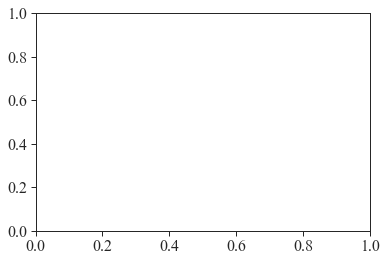

In [59]:
fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, rpts, cmap='RdBu', vmin=1.0, vmax=2.0)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [78]:
x

array([list([1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]),
       list([1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100

In [68]:
x

array([(1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0),
       (1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0, 1100.0,

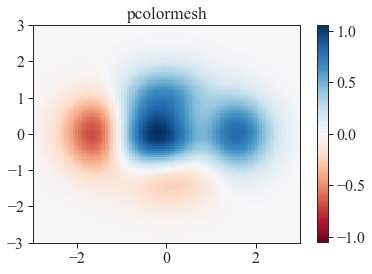

In [60]:

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [61]:
x.shape

(100, 100)

In [62]:
y.shape

(100, 100)

In [63]:
z.shape

(99, 99)